提取一张图片

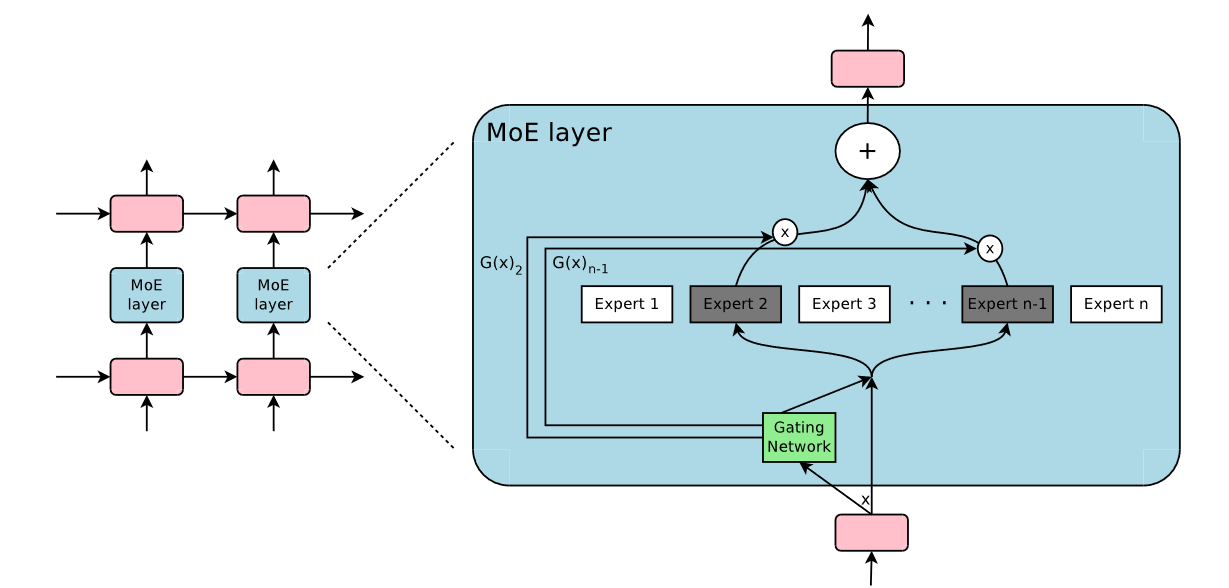

In [9]:
from io import BytesIO

import numpy as np
import pptx
from IPython.display import display
from PIL import Image
from pptx import Presentation

pptx_file = "test.pptx"
presentation = Presentation(pptx_file)


def get_image(presentation):
    for slide in presentation.slides:
        for shape in slide.shapes:
            if isinstance(shape, pptx.shapes.picture.Picture):
                img = Image.open(BytesIO(shape.image.blob)).convert("RGB")
                display(img)
                img = np.array(img)
                return img

img = get_image(presentation)    

去除黑色和白色

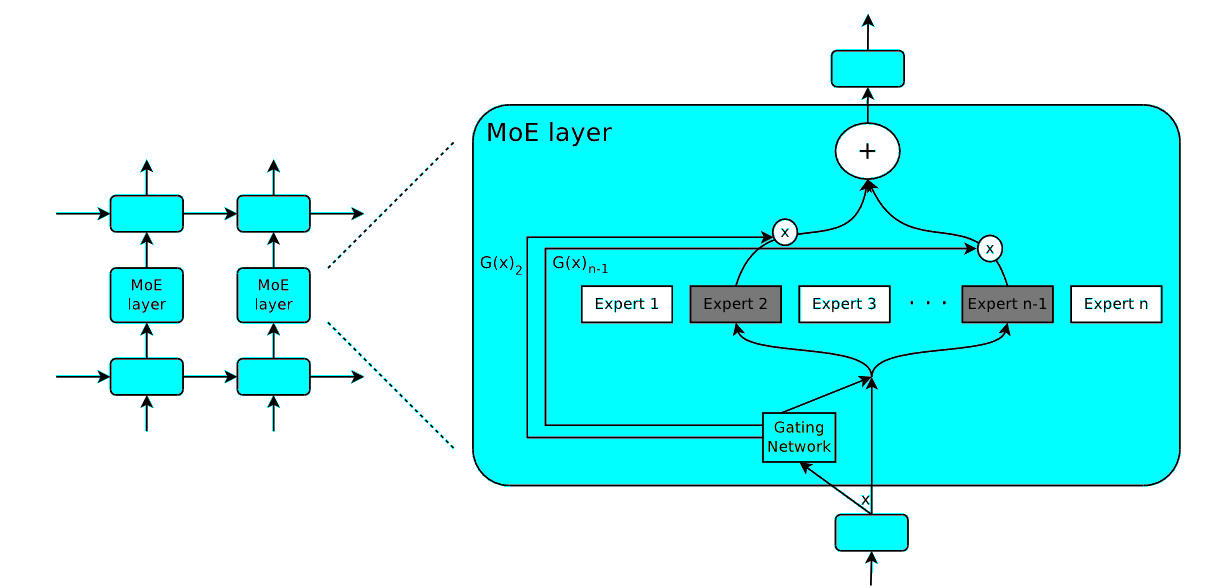

In [59]:
import numpy as np

height = img.shape[0]
width = img.shape[1]
pixels = np.array(img).reshape(height*width, 3)

gray_image = np.dot(pixels[..., :3], [0.2989, 0.5870, 0.1140])
mask = (gray_image > 150 )& (gray_image < 230)

display_pixels = pixels.copy()
display_pixels[mask] = [0, 255, 255]

display(Image.fromarray(display_pixels.reshape(height, width, 3).astype(np.uint8)))
masked_pixels = pixels[mask].copy()

对颜色值 K 聚类

[[172 215 228]
 [253 192 203]]


d:\Sci\Anaconda\envs\office\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


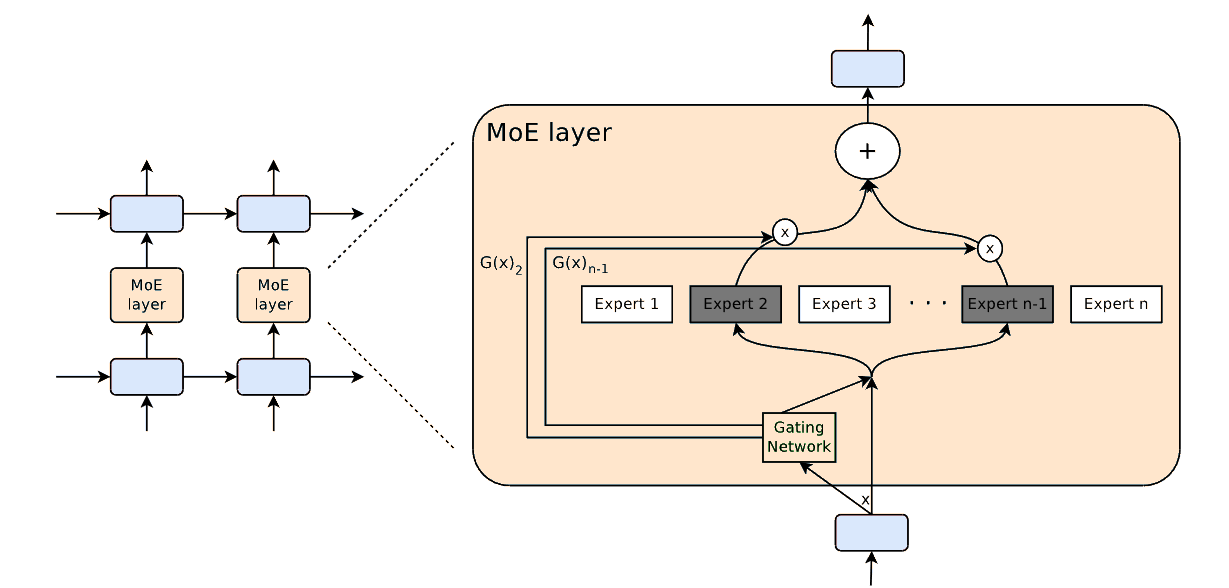

In [60]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(masked_pixels)
cluster_centers = kmeans.cluster_centers_.astype(int)
my_color = np.array([[255, 230, 204],  [218, 232, 252]])
print(cluster_centers)
compressed_image = pixels.copy()
compressed_image[mask] = my_color[kmeans.labels_]

display(Image.fromarray(compressed_image.reshape(height, width, 3).astype(np.uint8)))

获取 offset

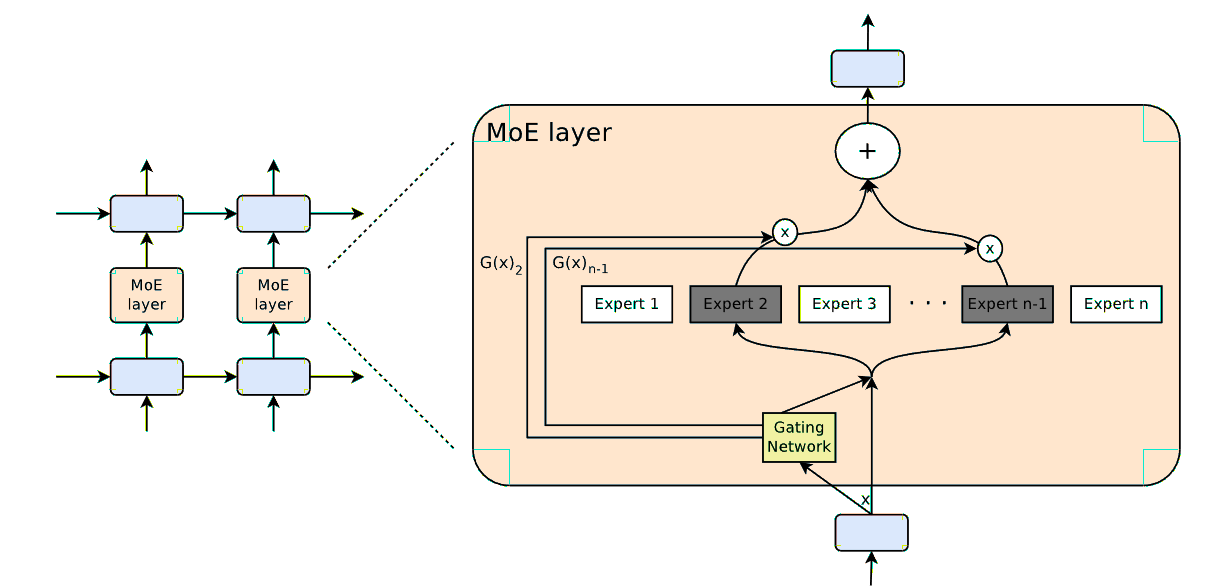

In [66]:
offset = masked_pixels - cluster_centers[kmeans.labels_]
offset.astype(float)
image_revised = compressed_image.copy().astype(float)
image_revised[mask] += offset * 0.5
display(Image.fromarray(image_revised.reshape(height, width, 3).astype(np.uint8)))